## In this Notebook we create the fifth figure of the paper 

##### What we do is as follows: We run several Sweepers and trade-offs between time-horizon and income goal with the carbon budget transgression as outcome. The defining distinction between those sweepers is whether high income groups (defined as higher than the scenario specific income goal) remain at their current income or degrow their income and another counterfactual scenario of business as usual growth

In [1]:
# Import all things necessary
from scenario_class import Scenario
from plots_class import Plots
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.cm as cm
from scenariosweeper_class import ScenarioSweeper
import matplotlib.gridspec as gridspec
import numpy as np

# Create a figure OLDER version
# fig = plt.figure(figsize=(15, 4))
# Define a GridSpec for a 2x2 grid
# Adjust the GridSpec to allocate more space for the subplot with the colorbar
# Add height_ratios for the rows. Adjust the values as needed.
# gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[2])  # Adjust the 2 as needed
# Create subplots
# ax1 = fig.add_subplot(gs[0, 0])  # First row, first column
# ax2 = fig.add_subplot(gs[0, 1])  # First row, second column
# ax3 = fig.add_subplot(gs[0, 2])  # First row, third column (with extra width)

# calculate how much emissions are emitted in a given scenario run and how far above this is the carbon budget by summing the yearly emissions of all countries
# Sweeper 1 
end_year_values = [2040, 2060, 2080, 2100]
income_goal_values = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values = [1150*0.95 - 2*35] #95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
gdp_assumption_values = ["constant_ratio"]
pop_growth_assumption_values = ["semi_log_model"]
tech_evolution_assumption_values = ["plausible"]
tech_hysteresis_assumption_values = ["on"]
steady_state_high_income_assumption_values = ["off"]
population_hysteresis_assumption_values = ["off"]
sigmoid_parameters = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate = [-0.05] # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
run_until_2100 = ["on"] # this is a string and either (1) on or (2) off for details see the scenario_class.py file
cdr_assumption = ["on"] # this is a string and either (1) on or (2) off for details see the scenario_class.py file
cdr_level_2100 = [5] #  in gigatons of
sweeper1 = ScenarioSweeper(end_year_values,
                           income_goal_values,
                           carbon_budget_values,
                           gdp_assumption_values,
                           pop_growth_assumption_values,
                           tech_evolution_assumption_values,
                           tech_hysteresis_assumption_values,
                           steady_state_high_income_assumption_values,
                           sigmoid_parameters,
                           final_improvement_rate,
                           population_hysteresis_assumption_values,
                           run_until_2100,
                           cdr_assumption,
                           cdr_level_2100)

# Sweeper 2
end_year_values2 = [2040, 2060, 2080, 2100]
income_goal_values2 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values2 = [1150*0.95 - 2*35] #95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
gdp_assumption_values2 = ["constant_ratio"]
pop_growth_assumption_values2 = ["semi_log_model"]
tech_evolution_assumption_values2 = ["plausible"]
tech_hysteresis_assumption_values2 = ["on"] # not necessary to have this on, because it should not change anything because no country is degrowing because steady state is on
steady_state_high_income_assumption_values2 = ["on"]
population_hysteresis_assumption_values2 = ["off"]  # not necessary to have this on, because it should not change anything because no country is degrowing because steady state is on
sweeper2 = ScenarioSweeper(end_year_values2,
                            income_goal_values2,
                            carbon_budget_values2,
                            gdp_assumption_values2,
                            pop_growth_assumption_values2,
                            tech_evolution_assumption_values2,
                            tech_hysteresis_assumption_values2,
                            steady_state_high_income_assumption_values2,
                            sigmoid_parameters,
                            final_improvement_rate,
                            population_hysteresis_assumption_values2,
                            run_until_2100,
                            cdr_assumption,
                            cdr_level_2100)

# Sweeper 3
end_year_values3 = [2040, 2060, 2080, 2100]
income_goal_values3 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values3 = [1150*0.95 - 2*35] #95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
gdp_assumption_values3 = ["constant_ratio"]
pop_growth_assumption_values3 = ["semi_log_model"]
tech_evolution_assumption_values3 = ["plausible"]
tech_hysteresis_assumption_values3 = ["on"] # not necessary to have this on, because it should not change anything because no country is degrowing because steady state is on with growth
steady_state_high_income_assumption_values3 = ["on_with_growth"]
population_hysteresis_assumption_values3 = ["off"]  # not necessary to have this on, because it should not change anything because no country is degrowing because steady state is on with growth
sweeper3 = ScenarioSweeper(end_year_values3,
                            income_goal_values3,
                            carbon_budget_values3,
                            gdp_assumption_values3,
                            pop_growth_assumption_values3,
                            tech_evolution_assumption_values3,
                            tech_hysteresis_assumption_values3,
                            steady_state_high_income_assumption_values3,
                            sigmoid_parameters,
                            final_improvement_rate,
                            population_hysteresis_assumption_values3,
                            run_until_2100,
                            cdr_assumption,
                            cdr_level_2100)

output_sweeper1 = sweeper1.run_scenarios() 
output_sweeper2 = sweeper2.run_scenarios()
output_sweeper3 = sweeper3.run_scenarios()

# output[0] is the emissions and output[1] is the gdp growth rate globally
input1 = output_sweeper1[0] # output now will be transformed to an input for the plots function
input2 = output_sweeper2[0] # output now will be transformed to an input for the plots function
input3 = output_sweeper3[0] # output now will be transformed to an input for the plots function

# get population below income goal in counterfactual scenari
population_below_income_goal = output_sweeper3[-1]

####### OLD PLOTTING CODE #######
###################################
###################################
# Create a new figure with four axes
#sweeper1.plot_total_emissions_trade_off(input1, ["end_year", "income_goal"], ax = ax1, fixed_color_scale=False, annotations_plot = False, colorscaleon = True)
#######sweeper2.plot_total_emissions_trade_off(input2, ["end_year", "income_goal"], ax = ax2, fixed_color_scale=False, annotations_plot = False, colorscaleon = True)   
#######sweeper3.plot_total_emissions_trade_off(input3, ["end_year", "income_goal"], ax = ax3, fixed_color_scale=False, annotations_plot = False, colorscaleon = True)

# After plotting:
# For ax2 and ax3, remove y-axis labels, tick labels, and tick markers
#######ax2.set_ylabel('')
#######ax2.set_yticks([])
#######ax3.set_ylabel('')
#######ax3.set_yticks([])
# delete y axis ticklabels
#######ax2.set_yticklabels([])
#######ax3.set_yticklabels([])
# Setting titles for each subplot
#######ax3.set_title("Above income goal historic growth", fontsize=10)
#######ax2.set_title("Above income goal steady state", fontsize=10)
#######ax1.set_title("Above income goal degrowth", fontsize=10)  # 'pad' adjusts the distance between the title and the plot

# annotate the costa rica scenario as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
#ax1.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
#ax2.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
#ax3.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
# annotate the costa rica scenario dots
#ax1.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax2.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax3.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')

# for all axes set colorbar ticks to min, 1, 1.5, 2, max
#######cbar = ax1.collections[0].colorbar
#######cbar.set_ticks([1, 1.5, 2])
#######cbar = ax2.collections[0].colorbar
#######cbar.set_ticks([1.5, 2])
#######cbar = ax3.collections[0].colorbar
#######cbar.set_ticks([1.5, 2, 2.5])

# Labeling the panels
#######labels = ['A', 'B', 'C']
#######axes = [ax1, ax2, ax3]

#######for ax, label in zip(axes, labels):
   ####### ax.text(-0.1, 1.1, label, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

#######plt.tight_layout()
# save high resolution as fig4
#######plt.savefig('fig4.png', dpi=300, bbox_inches='tight')
#######plt.show()

this is the cumulative emissions  before cdr adjustment 925012963465.9735
this is the cumulative emissions  after cdr adjustment 627512963465.9735
this is the cumulative emissions  before cdr adjustment 1581234195174.202
this is the cumulative emissions  after cdr adjustment 1283734195174.202
this is the cumulative emissions  before cdr adjustment 1936060908827.1318
this is the cumulative emissions  after cdr adjustment 1638560908827.1318
this is the cumulative emissions  before cdr adjustment 2253911016950.3374
this is the cumulative emissions  after cdr adjustment 1956411016950.3372
this is the cumulative emissions  before cdr adjustment 2544390048588.555
this is the cumulative emissions  after cdr adjustment 2246890048588.555
this is the cumulative emissions  before cdr adjustment 2802473147556.27
this is the cumulative emissions  after cdr adjustment 2504973147556.27
this is the cumulative emissions  before cdr adjustment 945003705576.9414
this is the cumulative emissions  after cd

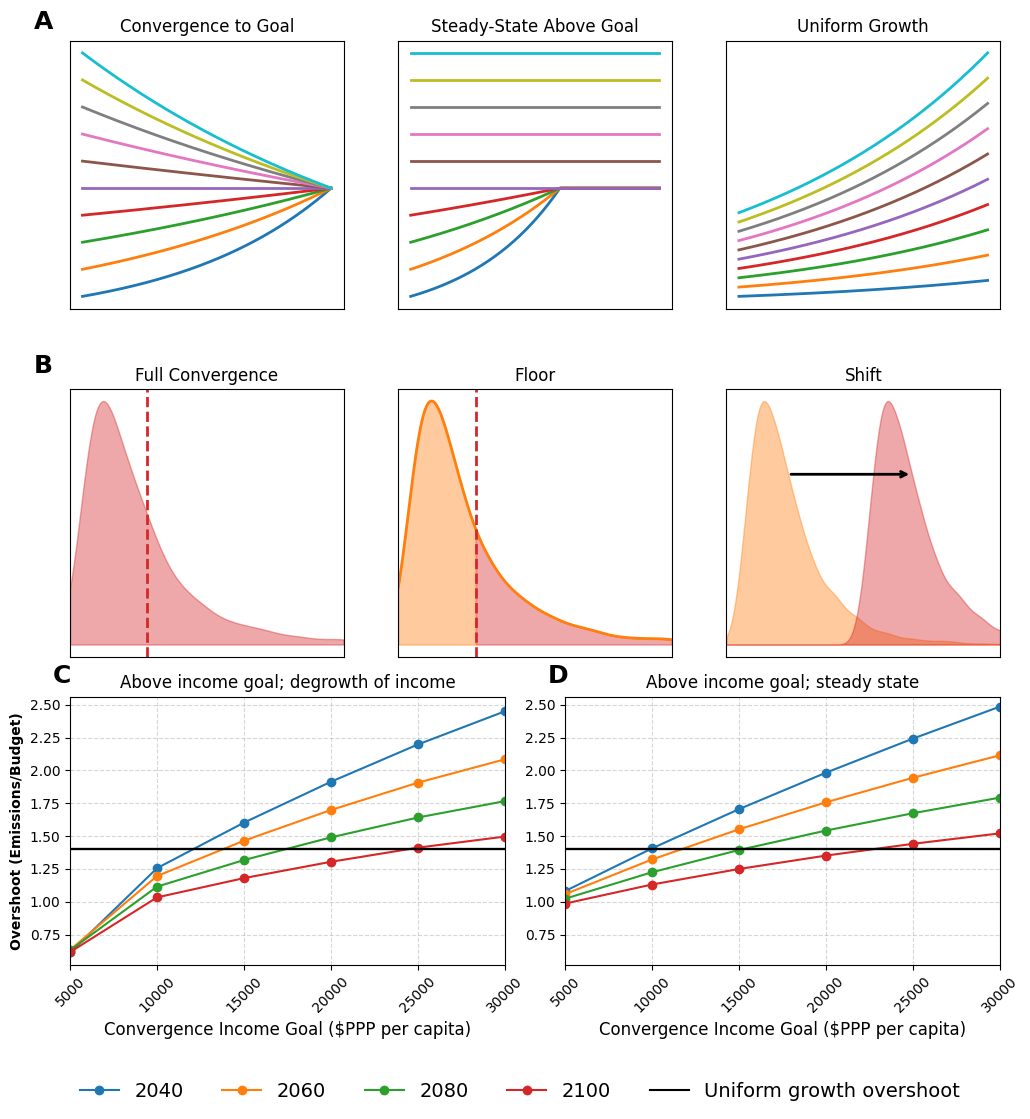

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Fix random seed
np.random.seed(42)

# Time axis for trajectories
t = np.linspace(0, 1, 200)

# Fake decile incomes
incomes0    = np.linspace(10, 100, 10)
income_goal = 50
growth_rate = 1.0

# Generate sample distributions
sample_D = np.random.lognormal(3.5, 0.8, 5000)
s1_E     = np.random.lognormal(3.5, 0.8, 5000)
floor_val= np.percentile(s1_E, 25)
base_F   = np.random.lognormal(3.5, 0.6, 5000)
shift_F  = base_F + 80

# x-limit
q95 = max(
    np.percentile(sample_D, 95),
    np.percentile(s1_E,      95),
    np.percentile(shift_F,   95)
) * 1.05

# Create 2x3 grid for top two rows
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

# Remove ticks/grid
for ax in axs.flatten():
    ax.set_xticks([]); ax.set_yticks([]); ax.grid(False)

# Panel A1
ax = axs[0,0]
for st in incomes0:
    ax.plot(t, st * (income_goal/st)**t, lw=2)
ax.set_title('Convergence to Goal')

# Panel A2
ax = axs[0,1]
for st in incomes0:
    if st >= income_goal:
        traj = np.full_like(t, st)
    else:
        fac = income_goal / st
        gtr = st * fac**(t/0.6)
        traj = np.where(t<0.6, gtr, income_goal)
    ax.plot(t, traj, lw=2)
ax.set_title('Steady-State Above Goal')

# Panel A3
ax = axs[0,2]
for st in incomes0:
    ax.plot(t, st * np.exp(growth_rate*t), lw=2)
ax.set_title('Uniform Growth')

# KDE x-grid
xgrid = np.linspace(0, q95, 300)

# Panel A4
ax = axs[1,0]
kde = gaussian_kde(sample_D); dens = kde(xgrid)
ax.fill_between(xgrid, dens, color='tab:red', alpha=0.4)
ax.axvline(income_goal, ls='--', color='tab:red', lw=2)
ax.set_title('Full Convergence')
ax.set_xlim(0, q95)

# Panel A5
ax = axs[1,1]
kde = gaussian_kde(s1_E); dens = kde(xgrid)
mask_b = xgrid <= income_goal
mask_a = xgrid >= income_goal
ax.fill_between(xgrid, dens, where=mask_b, color='tab:orange', alpha=0.4)
ax.fill_between(xgrid, dens, where=mask_a, color='tab:red',    alpha=0.4)
ax.plot(xgrid, dens, color='tab:orange', lw=2)
ax.axvline(income_goal, ls='--', color='tab:red', lw=2)
ax.set_title('Floor')
ax.set_xlim(0, q95)

# Panel A6
ax = axs[1,2]
kde_b = gaussian_kde(base_F); dens_b = kde_b(xgrid)
kde_s = gaussian_kde(shift_F); dens_s = kde_s(xgrid)
ax.fill_between(xgrid, dens_b, color='tab:orange', alpha=0.4)
ax.fill_between(xgrid, dens_s, color='tab:red',    alpha=0.4)
m_b = base_F.mean(); m_s = shift_F.mean()
ax.annotate('', xy=(m_s, np.interp(m_s, xgrid, dens_s)),
            xytext=(m_b, np.interp(m_b, xgrid, dens_b)),
            arrowprops=dict(arrowstyle='->', lw=2))
ax.set_title('Shift')
ax.set_xlim(0, q95)

# Calculate positions for third row axes
pos0 = axs[1,0].get_position()
pos2 = axs[1,2].get_position()
left = pos0.x0
right = pos2.x1
width = (right - left - 0.05) / 2  # subtract small gap

# bottom position slightly below row 2
height = pos0.height
bottom = pos0.y0 - height - 0.05

# Panel B
axB = fig.add_axes([left, bottom, width, height])
#axB.set_xticks([]); axB.set_yticks([]); axB.grid(False)

# Panel C
axC = fig.add_axes([left+width+0.05, bottom, width, height])
#axC.set_xticks([]); axC.set_yticks([]); axC.grid(False)

# Do this for B & C:
for ax in (axB, axC):
    ax.set_xticks([])           # still hide x-axis ticks
    ax.tick_params(left=True)   # turn y-axis ticks back on
    ax.grid(False)

# Plot overshoot on B & C
sweeper1.plot_overshoot_tradeoff(output_sweeper1[0], ['end_year','income_goal'], ax=axB)
sweeper2.plot_overshoot_tradeoff(output_sweeper2[0], ['end_year','income_goal'], ax=axC)

# Overlay C
for ax in (axB, axC):
    nb = len(ax.lines)
    sweeper3.plot_overshoot_tradeoff(output_sweeper3[0], ['end_year','income_goal'], ax=ax)
    new = ax.lines[nb:]
    for ln in new: ln.set_color('black'); ln.set_linestyle('-'); ln.set_marker('') 
new[0].set_label('Uniform growth overshoot')

# common y-lims
yl = [ax.get_ylim() for ax in (axB, axC)]
ymin = min(lo for lo, hi in yl); ymax = max(hi for lo, hi in yl)
for ax in (axB, axC): ax.set_ylim(ymin, ymax)

# --- Shared legend below row 3 --------
handles, labels = [], []
for ax in (axB, axC):
    h, l = ax.get_legend_handles_labels()
    for hi, li in zip(h, l):
        if li and li not in labels:
            handles.append(hi); labels.append(li)

# Place legend below the bottom panels:
fig.legend(
    handles, labels,
    loc='upper center',
    ncol=len(labels),
    frameon=False,
    fontsize=14,  
    bbox_to_anchor=(0.5, -0.4),  # y = -0.02 in figure coords
    bbox_transform=fig.transFigure
)


#axC set title
axC.set_title('Above income goal; steady state', fontsize=12)
axB.set_title('Above income goal; degrowth of income', fontsize=12)

# Group labels
fig.text(pos0.x0-0.03, pos0.y1+0.45, 'A', fontsize=18, fontweight='bold') # formerly ax1
fig.text(pos0.x0-0.03, pos0.y1+0.02, 'B', fontsize=18, fontweight='bold') # formerly ax2
axB.text(-0.04, 1.05, 'C', transform=axB.transAxes, fontsize=18, fontweight='bold') # formerly axB
axC.text(-0.04, 1.05, 'D', transform=axC.transAxes, fontsize=18, fontweight='bold') # formerly axC
axC.yaxis.label.set_visible(False)

"""
# 1) capture the original y‐limits so we can restore them
ymin, ymax = axC.get_ylim()

# 2) create a twin axis
axC2 = axC.twinx()

# 3) compute (income_goal, pop_share)
pop_dict = output_sweeper3[-1]
data = []
for key, pop in pop_dict.items():
    params = key if isinstance(key, dict) else dict(key)
    g = params.get('income_goal')
    data.append((g, pop))
data.sort(key=lambda x: x[0])
goals, pops = zip(*data)

# 4) plot on the twin axis
axC2.plot(goals, pops, color='black', marker='o', linestyle='--')
axC2.set_ylabel('Pop. below goal uniform growth', color='black')
axC2.yaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=0))
axC2.set_ylim(0, 1)

#for ax in (axB, axC):
 #   ax.margins(0) 

# 5) restore the original left‐axis limits so nothing else moves
axC.set_ylim(ymin, ymax)

# 6) optionally dim the twin‐axis spine so it doesn’t overpower
axC2.spines['right'].set_alpha(0.6)
"""
for ax in (axB, axC):
    ax.margins(0)
plt.savefig('fig5.png', dpi=300, bbox_inches='tight')
plt.show()



In [3]:
"""
# Create a figure
fig = plt.figure(figsize=(15, 4))

# Define a GridSpec for a 2x2 grid
# Adjust the GridSpec to allocate more space for the subplot with the colorbar
# Add height_ratios for the rows. Adjust the values as needed.
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[2])  # Adjust the 2 as needed
# Create subplots
ax4 = fig.add_subplot(gs[0, 0])  # First row, first column
ax5 = fig.add_subplot(gs[0, 1])  # First row, second column
ax6 = fig.add_subplot(gs[0, 2])  # First row, third column (with extra width)

# Sweeper 4
end_year_values4 = [2040, 2060, 2080, 2100]
income_goal_values4 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values4 = [1150*0.95 - 2*35]#95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
gdp_assumption_values4 = ["constant_ratio"]
pop_growth_assumption_values4 = ["semi_log_model"]
tech_evolution_assumption_values4 = ["plausible"]
tech_hysteresis_assumption_values4 = ["on"]
steady_state_high_income_assumption_values4 = ["off"]
population_hysteresis_assumption_values4 = ["on"]
sigmoid_parameters4 = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate4 = -0.02 # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
sweeper4 = ScenarioSweeper(end_year_values4,
                            income_goal_values4,
                            carbon_budget_values4,
                            gdp_assumption_values4,
                            pop_growth_assumption_values4,
                            tech_evolution_assumption_values4,
                            tech_hysteresis_assumption_values4,
                            steady_state_high_income_assumption_values4,
                            sigmoid_parameters4, # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
                            final_improvement_rate4,
                            population_hysteresis_assumption_values4)

# Sweeper 5
end_year_values5 = [2040, 2060, 2080, 2100]
income_goal_values5 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values5 = [1150*0.95 - 2*35]
hysteresis_tech_progress_values5 = [0.05]
gdp_assumption_values5 = ["constant_ratio"]
pop_growth_assumption_values5 = ["semi_log_model"]
tech_evolution_assumption_values5 = ["plausible"]
tech_hysteresis_assumption_values5 = ["on"]
steady_state_high_income_assumption_values5 = ["off"]
population_hysteresis_assumption_values5 = ["on"]
sigmoid_parameters5 = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate5 = -0.06 # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
sweeper5 = ScenarioSweeper(end_year_values5,
                           income_goal_values5,
                           carbon_budget_values5,
                           gdp_assumption_values5,
                           pop_growth_assumption_values5,
                           tech_evolution_assumption_values5,
                           tech_hysteresis_assumption_values5,
                           steady_state_high_income_assumption_values5,
                           sigmoid_parameters5,
                           final_improvement_rate5,
                           population_hysteresis_assumption_values5)


# Sweeper 6
end_year_values6 = [2040, 2060, 2080, 2100]
income_goal_values6 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values6 = [1150*0.95 - 2*35]
gdp_assumption_values6 = ["constant_ratio"]
pop_growth_assumption_values6 = ["semi_log_model"]
tech_evolution_assumption_values6 = ["plausible"]
tech_hysteresis_assumption_values6 = ["on"]
steady_state_high_income_assumption_values6 = ["off"]
population_hysteresis_assumption_values6 = ["on"]
sigmoid_parameters6 = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate6 = -0.18 # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
sweeper6 = ScenarioSweeper(end_year_values6,
                           income_goal_values6,
                           carbon_budget_values6,
                           gdp_assumption_values6,
                           pop_growth_assumption_values6,
                           tech_evolution_assumption_values6,
                           tech_hysteresis_assumption_values6,
                           steady_state_high_income_assumption_values6,
                           sigmoid_parameters6,
                           final_improvement_rate6,
                           population_hysteresis_assumption_values6)

output_sweeper4 = sweeper4.run_scenarios()
output_sweeper5 = sweeper5.run_scenarios()
output_sweeper6 = sweeper6.run_scenarios()

# output[0] is the emissions and output[1] is the gdp growth rate globally
input4 = output_sweeper4[0] # output now will be transformed to an input for the plots function
input5 = output_sweeper5[0] # output now will be transformed to an input for the plots function
input6 = output_sweeper6[0] # output now will be transformed to an input for the plots function
# Create a new figure with four axes
sweeper4.plot_total_emissions_trade_off(input4, ["end_year", "income_goal"], ax = ax4, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)
sweeper5.plot_total_emissions_trade_off(input5, ["end_year", "income_goal"], ax = ax5, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)   
sweeper6.plot_total_emissions_trade_off(input6, ["end_year", "income_goal"], ax = ax6, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)

ax4.set_title("Above goal degrowth & -2%/yr c. int.", fontsize = 10)
ax5.set_title("Above goal degrowth & -6%/yr  c. int.", fontsize = 10)
ax6.set_title("Above goal degrowth & -18%/yr c. int.", fontsize = 10)

ax5.set_yticklabels([])
ax6.set_yticklabels([])

# annotate the costa rica scenario as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax4.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax5.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax6.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
# annotate the costa rica scenario dots
#ax4.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax5.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax6.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')

# for all axes set colorbar ticks to min, 1, 1.5, 2, max
cbar = ax4.collections[0].colorbar
cbar.set_ticks([0.5, 1, 1.5, 2, 2.5])
cbar = ax5.collections[0].colorbar
cbar.set_ticks([0.5, 1, 1.5])
cbar = ax6.collections[0].colorbar
cbar.set_ticks([0.5, 0.9])

plt.tight_layout()
# save high resolution as supp_figx
plt.savefig('supp_figx.png', dpi=300, bbox_inches='tight')
plt.show()
"""

'\n# Create a figure\nfig = plt.figure(figsize=(15, 4))\n\n# Define a GridSpec for a 2x2 grid\n# Adjust the GridSpec to allocate more space for the subplot with the colorbar\n# Add height_ratios for the rows. Adjust the values as needed.\ngs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[2])  # Adjust the 2 as needed\n# Create subplots\nax4 = fig.add_subplot(gs[0, 0])  # First row, first column\nax5 = fig.add_subplot(gs[0, 1])  # First row, second column\nax6 = fig.add_subplot(gs[0, 2])  # First row, third column (with extra width)\n\n# Sweeper 4\nend_year_values4 = [2040, 2060, 2080, 2100]\nincome_goal_values4 = [5000, 10000, 15000, 20000, 25000, 30000]\ncarbon_budget_values4 = [1150*0.95 - 2*35]#95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model\ngdp_assumption_values4 = ["constant_ratio"]\npop_growth_assumption_values4 = ["semi_log_model"]\ntech_evolution_assumption_values4 = ["plausible"]\ntech_hy

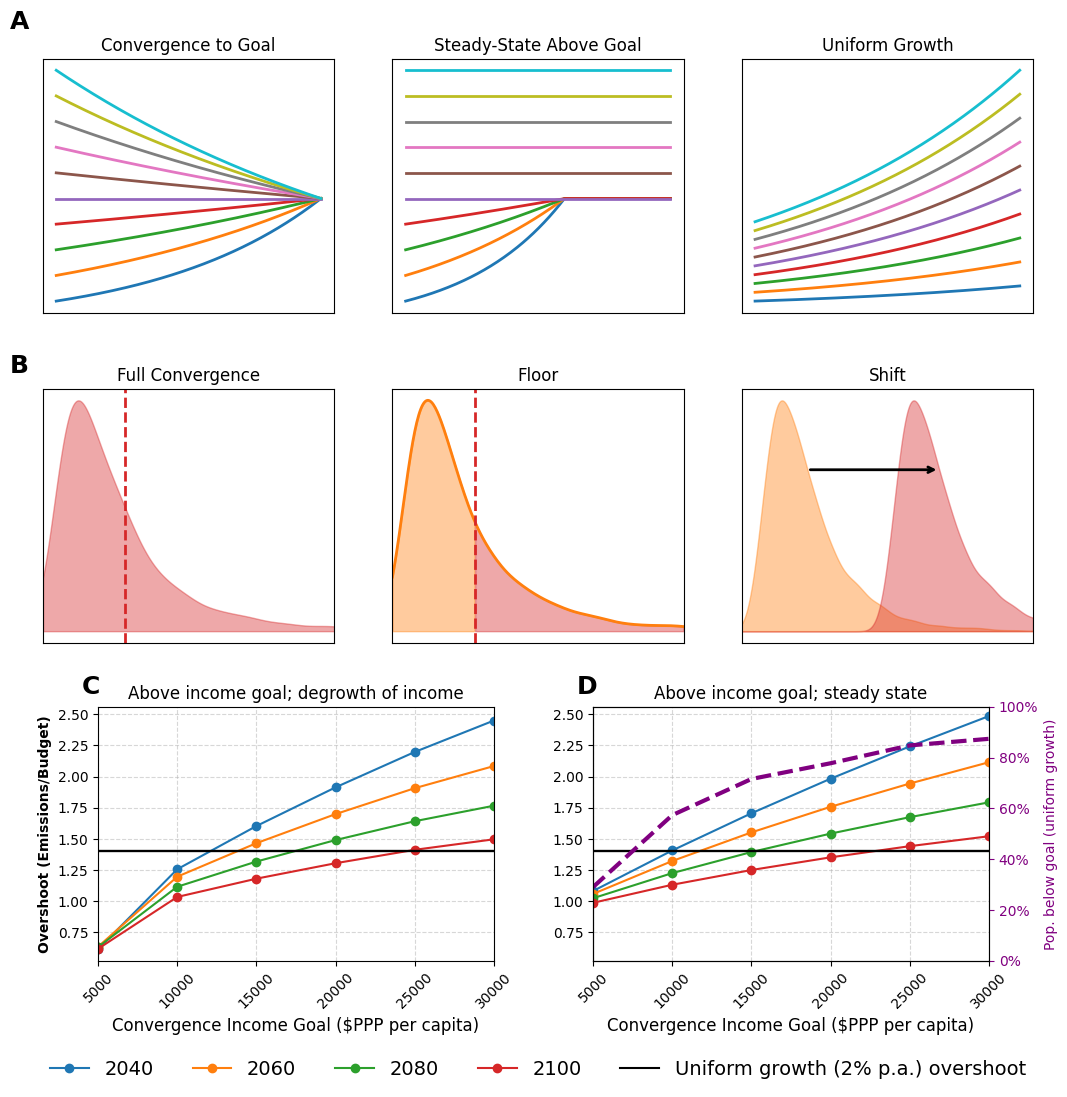

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.ticker import PercentFormatter  # for twin axis formatting

# Fix random seed
np.random.seed(42)

# Time axis for trajectories
t = np.linspace(0, 1, 200)

# Fake decile incomes
incomes0    = np.linspace(10, 100, 10)
income_goal = 50
growth_rate = 1.0

# Generate sample distributions
sample_D = np.random.lognormal(3.5, 0.8, 5000)
s1_E     = np.random.lognormal(3.5, 0.8, 5000)
floor_val= np.percentile(s1_E, 25)
base_F   = np.random.lognormal(3.5, 0.6, 5000)
shift_F  = base_F + 80

# x-limit
q95 = max(
    np.percentile(sample_D, 95),
    np.percentile(s1_E,      95),
    np.percentile(shift_F,   95)
) * 1.05

# Create 2x3 grid for top two rows
# narrowed figure width and reduced horizontal spacing
fig, axs = plt.subplots(2, 3, figsize=(11, 8))
plt.subplots_adjust(wspace=0.2, hspace=0.3, bottom=0.15, left=0.05, right=0.95)

# Remove ticks/grid
for ax in axs.flatten():
    ax.set_xticks([]); ax.set_yticks([]); ax.grid(False)

# Panel A1
ax = axs[0,0]
for st in incomes0:
    ax.plot(t, st * (income_goal/st)**t, lw=2)
ax.set_title('Convergence to Goal')

# Panel A2
ax = axs[0,1]
for st in incomes0:
    if st >= income_goal:
        traj = np.full_like(t, st)
    else:
        fac = income_goal / st
        gtr = st * fac**(t/0.6)
        traj = np.where(t<0.6, gtr, income_goal)
    ax.plot(t, traj, lw=2)
ax.set_title('Steady-State Above Goal')

# Panel A3
ax = axs[0,2]
for st in incomes0:
    ax.plot(t, st * np.exp(growth_rate*t), lw=2)
ax.set_title('Uniform Growth')

# KDE x-grid
xgrid = np.linspace(0, q95, 300)

# Panel A4
ax = axs[1,0]
kde = gaussian_kde(sample_D); dens = kde(xgrid)
ax.fill_between(xgrid, dens, color='tab:red', alpha=0.4)
ax.axvline(income_goal, ls='--', color='tab:red', lw=2)
ax.set_title('Full Convergence')
ax.set_xlim(0, q95)

# Panel A5
ax = axs[1,1]
kde = gaussian_kde(s1_E); dens = kde(xgrid)
mask_b = xgrid <= income_goal
mask_a = xgrid >= income_goal
ax.fill_between(xgrid, dens, where=mask_b, color='tab:orange', alpha=0.4)
ax.fill_between(xgrid, dens, where=mask_a, color='tab:red',    alpha=0.4)
ax.plot(xgrid, dens, color='tab:orange', lw=2)
ax.axvline(income_goal, ls='--', color='tab:red', lw=2)
ax.set_title('Floor')
ax.set_xlim(0, q95)

# Panel A6
ax = axs[1,2]
kde_b = gaussian_kde(base_F); dens_b = kde_b(xgrid)
kde_s = gaussian_kde(shift_F); dens_s = kde_s(xgrid)
ax.fill_between(xgrid, dens_b, color='tab:orange', alpha=0.4)
ax.fill_between(xgrid, dens_s, color='tab:red',    alpha=0.4)
m_b = base_F.mean(); m_s = shift_F.mean()
ax.annotate('', xy=(m_s, np.interp(m_s, xgrid, dens_s)),
            xytext=(m_b, np.interp(m_b, xgrid, dens_b)),
            arrowprops=dict(arrowstyle='->', lw=2))
ax.set_title('Shift')
ax.set_xlim(0, q95)

# Calculate positions for third row axes
pos0 = axs[1,0].get_position()
pos2 = axs[1,2].get_position()
left = pos0.x0
right = pos2.x1
width = (right - left - 0.1) / 2
height = pos0.height
bottom = pos0.y0 - height - 0.08

# Panel B
axB = fig.add_axes([left+0.05, bottom, width, height])
# Panel C
axC = fig.add_axes([left + width + 0.1, bottom, width, height])

for ax in (axB, axC):
    ax.set_xticks([])
    ax.tick_params(left=True)
    ax.grid(False)

# Plot overshoot on B & C
sweeper1.plot_overshoot_tradeoff(output_sweeper1[0], ['end_year','income_goal'], ax=axB)
sweeper2.plot_overshoot_tradeoff(output_sweeper2[0], ['end_year','income_goal'], ax=axC)

# Overlay C
for ax in (axB, axC):
    nb = len(ax.lines)
    sweeper3.plot_overshoot_tradeoff(output_sweeper3[0], ['end_year','income_goal'], ax=ax)
    new = ax.lines[nb:]
    for ln in new: ln.set_color('black'); ln.set_linestyle('-'); ln.set_marker('')
new[0].set_label('Uniform growth (2% p.a.) overshoot')

# Common y-lims
yl = [ax.get_ylim() for ax in (axB, axC)]
miny = min(lo for lo, hi in yl); maxy = max(hi for lo, hi in yl)
for ax in (axB, axC): ax.set_ylim(miny, maxy)

# Twin axis on C
orig_ylim = axC.get_ylim()
axC2 = axC.twinx()
data = []
for key, pop in output_sweeper3[-1].items():
    params = key if isinstance(key, dict) else dict(key)
    data.append((params.get('income_goal'), pop))
data.sort(key=lambda x: x[0])
goals, pops = zip(*data)
axC2.plot(goals, pops, linestyle='--', color='purple', lw=3)
axC2.set_ylabel('Pop. below goal (uniform growth)', color='purple')
axC2.yaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=0))
axC2.tick_params(axis='y', colors='purple')
axC2.set_ylim(0, 1)
axC.set_ylim(orig_ylim)
axC2.spines['right'].set_alpha(0.6)

# Shared legend (pulled closer)
handles, labels = [], []
for ax in (axB, axC):
    h, l = ax.get_legend_handles_labels()
    for hi, li in zip(h, l):
        if li not in labels and li:
            handles.append(hi); labels.append(li)
fig.legend(handles, labels, loc='upper center', ncol=len(labels), frameon=False,
           fontsize=14, bbox_to_anchor=(0.5, -0.35), bbox_transform=fig.transFigure)

# Titles and group labels
axB.set_title('Above income goal; degrowth of income', fontsize=12)
axC.set_title('Above income goal; steady state', fontsize=12)
fig.text(pos0.x0-0.03, pos0.y1+0.45, 'A', fontsize=18, fontweight='bold')
fig.text(pos0.x0-0.03, pos0.y1+0.02, 'B', fontsize=18, fontweight='bold')
axB.text(-0.04, 1.05, 'C', transform=axB.transAxes, fontsize=18, fontweight='bold')
axC.text(-0.04, 1.05, 'D', transform=axC.transAxes, fontsize=18, fontweight='bold')
axC.yaxis.label.set_visible(False)

for ax in (axB, axC): ax.margins(0)

# grab the original axes box and shrink it:
box = axC.get_position()
axC.set_position([box.x0,
                 box.y0,
                 box.width * 0.9,   # 80% width
                 box.height]) # 80% height

# same with axB
box = axB.get_position()
axB.set_position([box.x0,
                 box.y0,
                 box.width * 0.9,   # 80% width
                 box.height]) # 80% height

plt.savefig('fig5_final.png', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
'''# grab the original axes box and shrink it:
box = axC.get_position()
axC.set_position([box.x0,
                 box.y0,
                 box.width * 0.9,   # 80% width
                 box.height * 0.9]) # 80% height

# same with axB
box = axB.get_position()
axB.set_position([box.x0,
                 box.y0,
                 box.width * 0.9,   # 80% width
                 box.height * 0.9]) # 80% height

                 '''

## new code to join the above two figures

In [4]:
"""
# make new figure with 6 axes and panels which brings together the two figures above for the main figure and use grid spec
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a new figure
fig = plt.figure(figsize=(15, 8))

# Define a GridSpec for a 2x3 grid
gs = gridspec.GridSpec(2, 3, figure=fig)

# Add the subplots from the previous figures to the new figure
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])

sweeper1.plot_total_emissions_trade_off(input1, ["end_year", "income_goal"], ax=ax1, fixed_color_scale=False, annotations_plot=True, colorscaleon=True)
sweeper2.plot_total_emissions_trade_off(input2, ["end_year", "income_goal"], ax=ax2, fixed_color_scale=False, annotations_plot=True, colorscaleon=True)
sweeper3.plot_total_emissions_trade_off(input3, ["end_year", "income_goal"], ax=ax3, fixed_color_scale=False, annotations_plot=True, colorscaleon=True)
sweeper4.plot_total_emissions_trade_off(input4, ["end_year", "income_goal"], ax=ax4, fixed_color_scale = False, annotations_plot = True, colorscaleon = True)
sweeper5.plot_total_emissions_trade_off(input5, ["end_year", "income_goal"], ax=ax5, fixed_color_scale = False, annotations_plot = True, colorscaleon = True)   
sweeper6.plot_total_emissions_trade_off(input6, ["end_year", "income_goal"], ax=ax6, fixed_color_scale = False, annotations_plot = True, colorscaleon = True)

########################################
############ AX ANNOTATIONS ############
########################################

# After plotting:
# For ax2 and ax3, remove y-axis labels, tick labels, and tick markers
ax2.set_ylabel('')
ax2.set_yticks([])
ax3.set_ylabel('')
ax3.set_yticks([])
# delete y axis ticklabels
ax2.set_yticklabels([])
ax3.set_yticklabels([])
# Setting titles for each subplot
ax3.set_title("Above income goal historic growth", fontsize=10)
ax2.set_title("Above income goal steady state", fontsize=10)
ax1.set_title("Above income goal degrowth", fontsize=10)  # 'pad' adjusts the distance between the title and the plot
# annotate the costa rica scenario as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax1.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax2.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax3.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
# annotate the costa rica scenario dots
#ax1.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax2.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax3.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
# for all axes set colorbar ticks to min, 1, 1.5, 2, max
cbar = ax1.collections[0].colorbar
cbar.set_ticks([0.5, 1, 1.5, 1.7])
cbar = ax2.collections[0].colorbar
cbar.set_ticks([1, 1.5, 1.8])
cbar = ax3.collections[0].colorbar
cbar.set_ticks([1, 1.5, 2])

# annotate ax1 with the pure redistribution scenario
ax1.scatter(2060, 7000, s=100, c='black', marker='o', zorder = 5, label='Redistr. 2060')
#ax1.annotate("2060\npure\nredistr.", (2060, 7000), textcoords="offset points", xytext=(-50,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
# annotate arrow to blue region in ax3 with text "Diminishing feasible region" and to ax6 with increasing feasile region
ax3.annotate("Diminishing\n feasible region", (2045, 22000), textcoords="offset points", xytext=(65,20), ha='center', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"), color='white')
# annotate arrow to blue region in ax3 with text "Diminishing feasible region" and to ax6 with increasing feasile region
ax6.annotate("Expanding\n feasible region", (2080, 6000), textcoords="offset points", xytext=(40,50), ha='center', fontsize=8)


ax4.set_title("Above goal degrowth & -2%/yr c. int.", fontsize = 10)
ax5.set_title("Above goal degrowth & -6%/yr  c. int.", fontsize = 10)
ax6.set_title("Above goal degrowth & -18%/yr c. int.", fontsize = 10)
ax5.set_yticklabels([])
ax6.set_yticklabels([])
# annotate the costa rica scenario as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax4.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax5.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax6.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
# annotate the costa rica scenario dots
#ax4.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax5.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax6.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
# for all axes set colorbar ticks to min, 1, 1.5, 2, max
cbar = ax4.collections[0].colorbar
cbar.set_ticks([0.5, 1, 1.5, 2, 2.5])
cbar = ax5.collections[0].colorbar
cbar.set_ticks([0.5, 1, 1.5])
cbar = ax6.collections[0].colorbar
cbar.set_ticks([0.5, 0.9])

# annotate the pure redistribution (so no aggregate growth) as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax4.scatter(2060, 7000, s=100, c='black', marker='o', zorder = 5, label='Redistr. 2060')
ax5.scatter(2060, 7000, s=100, c='black', marker='o', zorder = 5, label='Redistr. 2060')
ax6.scatter(2060, 7000, s=100, c='black', marker='o', zorder = 5, label='Redistr. 2060')
# annotate the costa rica scenario dots
#ax4.annotate("2060\npure\nredistr.", (2060, 7000), textcoords="offset points", xytext=(-50,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax5.annotate("2060\npure\nredistr.", (2060, 7000), textcoords="offset points", xytext=(-50,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax6.annotate("2060\npure\nredistr.", (2060, 7000), textcoords="offset points", xytext=(-50,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')

# Panel labels
labels = ["A", "B", "C", "D", "E", "F"]
# Coordinates for the labels to be placed, relative to the figure size
# These values might need adjustment depending on the exact figure layout
label_coords = [(0.06, 1.01), (0.37, 1.01), (0.68, 1.01), 
                (0.06, 0.51), (0.37, 0.51), (0.68, 0.51)]

for label, (x, y) in zip(labels, label_coords):
    fig.text(x, y, label, fontsize=16, fontweight='bold', va='top', ha='left')

# growth rate demarcations for axes a, d, e, f (NOT FOR B AND C because they do not have the same avg. global growth rates as other convergence scenarios)
# List of axes and skip axes 2 and 3
axes = [ax1, ax4, ax5, ax6]  # Use only axes 1, 4, 5, and 6
# Define the coordinates for different growth rate feasible regions
coords = {
    0: np.array([[2040., 7091.76725433],
                 [2060., 7104.1157445],
                 [2078.19032277, 7107.60378143],
                 [2081.80967737, 7108.11988921],
                 [2100., 7109.81960993]]),
    0.04: np.array([[2040., 13763.74664383],
                    [2044.7325622, 15000.],
                    [2053.52721919, 20000.],
                    [2057.06128359, 24277.62144207],
                    [2058.02526381, 25748.84170682],
                    [2060., 29776.31871013],
                    [2060.31708066, 30000.]])
}

# Plotting for each set of coordinates in the specified axes
for ax in axes:
    ######## Add extracted growth rates feasible regions lines
    for level, coords_data in coords.items():
        label = f"{level*100:.0f}%"  # Convert level to percentage
        ax.plot(coords_data[:, 0], coords_data[:, 1], color="cyan", linestyle='--', label=label)
        ax.set_xlabel("Year")
        ax.set_ylabel("Income Goal $PPPpc")

# delete y axis ticklabels
ax5.set_ylabel('')
ax5.set_yticks([])
ax6.set_ylabel('')
ax6.set_yticks([])
ax5.set_yticklabels([])
ax6.set_yticklabels([])

# Adjust the layout of the subplots
fig.tight_layout()
# save high resolution as supp_figx
plt.savefig('fig4.png', dpi=300, bbox_inches='tight')
plt.show()
"""

'\n# make new figure with 6 axes and panels which brings together the two figures above for the main figure and use grid spec\nimport matplotlib.pyplot as plt\nimport matplotlib.gridspec as gridspec\n\n# Create a new figure\nfig = plt.figure(figsize=(15, 8))\n\n# Define a GridSpec for a 2x3 grid\ngs = gridspec.GridSpec(2, 3, figure=fig)\n\n# Add the subplots from the previous figures to the new figure\nax1 = fig.add_subplot(gs[0, 0])\nax2 = fig.add_subplot(gs[0, 1])\nax3 = fig.add_subplot(gs[0, 2])\nax4 = fig.add_subplot(gs[1, 0])\nax5 = fig.add_subplot(gs[1, 1])\nax6 = fig.add_subplot(gs[1, 2])\n\nsweeper1.plot_total_emissions_trade_off(input1, ["end_year", "income_goal"], ax=ax1, fixed_color_scale=False, annotations_plot=True, colorscaleon=True)\nsweeper2.plot_total_emissions_trade_off(input2, ["end_year", "income_goal"], ax=ax2, fixed_color_scale=False, annotations_plot=True, colorscaleon=True)\nsweeper3.plot_total_emissions_trade_off(input3, ["end_year", "income_goal"], ax=ax3, fix

In [5]:
# last thing we should test is an above income goal growth regime with decarbonisation. to see whether decarbonisation or degrowth is more important
"""
# Create a figure
fig = plt.figure(figsize=(15, 4))

# Define a GridSpec for a 2x2 grid
# Adjust the GridSpec to allocate more space for the subplot with the colorbar
# Add height_ratios for the rows. Adjust the values as needed.
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[2])  # Adjust the 2 as needed
# Create subplots
ax7 = fig.add_subplot(gs[0, 0])  # First row, first column
ax8 = fig.add_subplot(gs[0, 1])  # First row, second column
ax9 = fig.add_subplot(gs[0, 2])  # First row, third column (with extra width)

# Sweeper 7
end_year_values7 = [2040, 2060, 2080, 2100]
income_goal_values7 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values7 = [1150*0.95 - 2*35]#95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
gdp_assumption_values7 = ["constant_ratio"]
pop_growth_assumption_values7 = ["semi_log_model"]
tech_evolution_assumption_values7 = ["plausible"]
tech_hysteresis_assumption_values7 = ["off"]
steady_state_high_income_assumption_values7 = ["on_with_growth"]
population_hysteresis_assumption_values7 = ["off"]
sigmoid_parameters7 = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate7 = -0.02 # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
sweeper7 = ScenarioSweeper(end_year_values7,
                           income_goal_values7,
                           carbon_budget_values7,
                           gdp_assumption_values7,
                           pop_growth_assumption_values7,
                           tech_evolution_assumption_values7,
                           tech_hysteresis_assumption_values7,
                           steady_state_high_income_assumption_values7,
                           sigmoid_parameters7,
                           final_improvement_rate7,
                           population_hysteresis_assumption_values7)

# Sweeper 8
end_year_values8 = [2040, 2060, 2080, 2100]
income_goal_values8 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values8 = [1150*0.95 - 2*35]
gdp_assumption_values8 = ["constant_ratio"]
pop_growth_assumption_values8 = ["semi_log_model"]
tech_evolution_assumption_values8 = ["plausible"]
tech_hysteresis_assumption_values8 = ["off"]
steady_state_high_income_assumption_values8 = ["on_with_growth"]
population_hysteresis_assumption_values8 = ["off"]
sigmoid_parameters8 = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate8 = -0.06 # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
sweeper8 = ScenarioSweeper(end_year_values8,
                           income_goal_values8,
                           carbon_budget_values8,
                           gdp_assumption_values8,
                           pop_growth_assumption_values8,
                           tech_evolution_assumption_values8,
                           tech_hysteresis_assumption_values8,
                           steady_state_high_income_assumption_values8,
                           sigmoid_parameters8,
                           final_improvement_rate8,
                           population_hysteresis_assumption_values8)

# Sweeper 9
end_year_values9 = [2040, 2060, 2080, 2100]
income_goal_values9 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values9 = [1150*0.95 - 2*35]
gdp_assumption_values9 = ["constant_ratio"]
pop_growth_assumption_values9 = ["semi_log_model"]
tech_evolution_assumption_values9 = ["plausible"]
tech_hysteresis_assumption_values9 = ["off"]
steady_state_high_income_assumption_values9 = ["on_with_growth"]
population_hysteresis_assumption_values9 = ["off"]
sigmoid_parameters9 = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate9 = -0.18 # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
sweeper9 = ScenarioSweeper(end_year_values9,
                           income_goal_values9,
                           carbon_budget_values9,
                           gdp_assumption_values9,
                           pop_growth_assumption_values9,
                           tech_evolution_assumption_values9,
                           tech_hysteresis_assumption_values9,
                           steady_state_high_income_assumption_values9,
                           sigmoid_parameters9,
                           final_improvement_rate9,
                           population_hysteresis_assumption_values9)
                

output_sweeper7 = sweeper7.run_scenarios()
output_sweeper8 = sweeper8.run_scenarios()
output_sweeper9 = sweeper9.run_scenarios()

# output[0] is the emissions and output[1] is the gdp growth rate globally
input7 = output_sweeper7[0] # output now will be transformed to an input for the plots function
input8 = output_sweeper8[0] # output now will be transformed to an input for the plots function
input9 = output_sweeper9[0] # output now will be transformed to an input for the plots function

# Create a new figure with four axes
sweeper7.plot_total_emissions_trade_off(input7, ["end_year", "income_goal"], ax = ax7, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)
sweeper8.plot_total_emissions_trade_off(input8, ["end_year", "income_goal"], ax = ax8, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)   
sweeper9.plot_total_emissions_trade_off(input9, ["end_year", "income_goal"], ax = ax9, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)
ax7.set_title("Above goal growth & -2%/yr c. int.", fontsize = 10)
ax8.set_title("Above goal growth & -6%/yr c. int.", fontsize = 10)
ax9.set_title("Above goal growth & -18%/yr c. int.", fontsize = 10)
ax8.set_yticklabels([])
ax9.set_yticklabels([])

# annotate the costa rica scenario as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax7.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax8.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax9.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
# for all axes set colorbar ticks to min, 1, 1.5, 2, max
cbar = ax7.collections[0].colorbar
cbar.set_ticks([1, 1.5, 2, 2.5, 3])
cbar = ax8.collections[0].colorbar
cbar.set_ticks([1, 1.5,])
cbar = ax9.collections[0].colorbar
cbar.set_ticks([0.6, 0.8])

plt.tight_layout()
# save high resolution as supp_figx
plt.savefig('supp_figyy.png', dpi=300, bbox_inches='tight')
plt.show()

"""

'\n# Create a figure\nfig = plt.figure(figsize=(15, 4))\n\n# Define a GridSpec for a 2x2 grid\n# Adjust the GridSpec to allocate more space for the subplot with the colorbar\n# Add height_ratios for the rows. Adjust the values as needed.\ngs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[2])  # Adjust the 2 as needed\n# Create subplots\nax7 = fig.add_subplot(gs[0, 0])  # First row, first column\nax8 = fig.add_subplot(gs[0, 1])  # First row, second column\nax9 = fig.add_subplot(gs[0, 2])  # First row, third column (with extra width)\n\n# Sweeper 7\nend_year_values7 = [2040, 2060, 2080, 2100]\nincome_goal_values7 = [5000, 10000, 15000, 20000, 25000, 30000]\ncarbon_budget_values7 = [1150*0.95 - 2*35]#95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model\ngdp_assumption_values7 = ["constant_ratio"]\npop_growth_assumption_values7 = ["semi_log_model"]\ntech_evolution_assumption_values7 = ["plausible"]\ntech_hy